In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


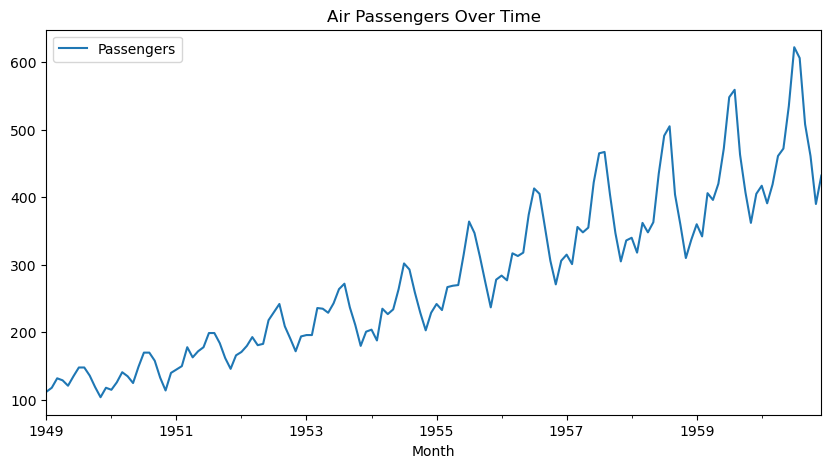

In [4]:
# Load the dataset
file_path = 'AirPassengers.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
print(data.head())

# Assuming the dataset has 'Month' and 'Passengers' columns
# Parse 'Month' as datetime and set it as the index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Visualize the data
data.plot(subplots=True, figsize=(10, 5))
plt.title("Air Passengers Over Time")
plt.show()

In [5]:
# Normalize the 'Passengers' column to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Passengers']])

In [6]:
# Function to create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Define sequence length (e.g., 60 time steps to predict the next value)
SEQ_LENGTH = 60


In [7]:
# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape X to be [samples, time steps, features] for GRU input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and test sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# Build the GRU model
model = Sequential()

# Add GRU layer with 100 units and return_sequences=True for stacked GRU
model.add(GRU(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add another GRU layer with 100 units
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer for output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the GRU model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
2/2 [==============================] - 5s 870ms/step - loss: 0.1850 - val_loss: 0.1545
Epoch 2/20
2/2 [==============================] - 0s 83ms/step - loss: 0.0573 - val_loss: 0.0291
Epoch 3/20
2/2 [==============================] - 0s 101ms/step - loss: 0.0155 - val_loss: 0.0525
Epoch 4/20
2/2 [==============================] - 0s 79ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 5/20
2/2 [==============================] - 0s 87ms/step - loss: 0.0253 - val_loss: 0.0256
Epoch 6/20
2/2 [==============================] - 0s 83ms/step - loss: 0.0185 - val_loss: 0.0276
Epoch 7/20
2/2 [==============================] - 0s 77ms/step - loss: 0.0125 - val_loss: 0.0316
Epoch 8/20
2/2 [==============================] - 0s 93ms/step - loss: 0.0132 - val_loss: 0.0311
Epoch 9/20
2/2 [==============================] - 0s 93ms/step - loss: 0.0143 - val_loss: 0.0300
Epoch 10/20
2/2 [==============================] - 0s 87ms/step - loss: 0.0124 - val_loss: 0.0265
Epoch 11/20
2/2 [==========

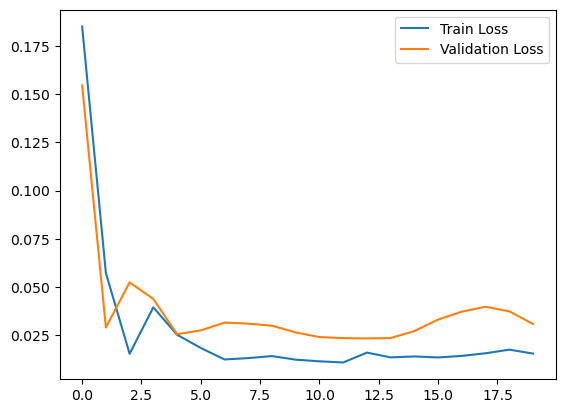

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 693ms/step


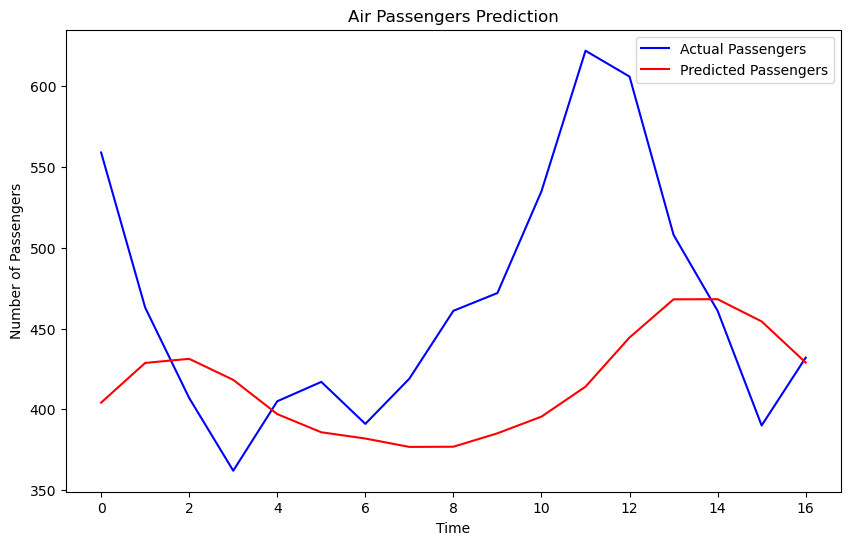

In [11]:
# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Inverse scale the actual values
y_test_rescaled = scaler.inverse_transform([y_test])

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled[0], color='blue', label='Actual Passengers')
plt.plot(predictions, color='red', label='Predicted Passengers')
plt.title('Air Passengers Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()